In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install torch torchvision
!pip install transformers
!pip install timm
!pip install scipy
!pip install pycocotools
!pip install albumentations

In [ ]:
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 144.4 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.2
    Uninstalling transformers-4.57.2:
      Successfully uninstalled transformers-4.57.2


In [ ]:
import torch
import cv2
import numpy as np
import os
from PIL import Image
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import albumentations as A
from transformers import DetrImageProcessor, DetrForObjectDetection

LOADING DETR MODEL WITH TRANSFER LEARNING


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2446: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2446: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2446: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

  Loaded COCO pre-trained weights:
   • Backbone: ResNet-50 trained on ImageNet + COCO
   • Transformer Encoder: Pre-trained on COCO
   • Transformer Decoder: Pre-trained on COCO
   • Object queries: Pre-trained patterns

 Modified classification head:
   • Old: 91 classes (COCO)
   • New: 1 class (car)
   • Only classification layer is re-initialized
   • All other layers keep pre-trained weights

Total parameters: 41,501,638
Trainable parameters: 41,279,238

 Training samples: 1386
 Validation samples: 70
 Training batches: 693
 Validation batches: 35

    Optimizer configured:
   Transformer LR: 0.0001
   Backbone LR: 1e-05 (lower for fine-tuning)
   Weight decay: 0.0001
   LR drop at epoch: 20

STARTING DETR TRAINING WITH TRANSFER LEARNING
Device: cuda
Epochs: 30
Batch size: 2
Mixed Precision: True
Pre-trained: COCO weights



Epoch 1/30: 100%|██████████| 693/693 [05:24<00:00,  2.14it/s, loss=1.4495]



EPOCH 1/30 SUMMARY
Train Loss: 1.9742
Val Loss: 1.1948
Val Loss Components:
   loss_ce: 0.2895
   loss_bbox: 0.0292
   loss_giou: 0.3797
   cardinality_error: 28.1857
Learning Rate: 0.000100
Saved best model! (val_loss: 1.1948)
  Initial best val_loss: 1.1948


Epoch 2/30: 100%|██████████| 693/693 [02:55<00:00,  3.96it/s, loss=1.9285]



EPOCH 2/30 SUMMARY
Train Loss: 1.7017
Val Loss: 1.1962
Val Loss Components:
   loss_ce: 0.3010
   loss_bbox: 0.0280
   loss_giou: 0.3776
   cardinality_error: 24.7000
Learning Rate: 0.000100
Best val_loss: 1.1948 (epoch 1)
  No improvement. EarlyStopping: 1/7


Epoch 3/30: 100%|██████████| 693/693 [02:56<00:00,  3.92it/s, loss=1.0852]



EPOCH 3/30 SUMMARY
Train Loss: 1.6128
Val Loss: 0.9875
Val Loss Components:
   loss_ce: 0.1907
   loss_bbox: 0.0265
   loss_giou: 0.3322
   cardinality_error: 11.7857
Learning Rate: 0.000100
Saved best model! (val_loss: 0.9875)
  Val loss improved by 0.2073


Epoch 4/30: 100%|██████████| 693/693 [02:53<00:00,  3.99it/s, loss=1.2643]



EPOCH 4/30 SUMMARY
Train Loss: 1.5680
Val Loss: 0.8604
Val Loss Components:
   loss_ce: 0.1960
   loss_bbox: 0.0201
   loss_giou: 0.2818
   cardinality_error: 20.4429
Learning Rate: 0.000100
Saved best model! (val_loss: 0.8604)
  Val loss improved by 0.1271


Epoch 5/30: 100%|██████████| 693/693 [02:52<00:00,  4.01it/s, loss=1.5667]



EPOCH 5/30 SUMMARY
Train Loss: 1.5505
Val Loss: 0.7972
Val Loss Components:
   loss_ce: 0.1714
   loss_bbox: 0.0181
   loss_giou: 0.2676
   cardinality_error: 14.3714
Learning Rate: 0.000100
Saved best model! (val_loss: 0.7972)
Checkpoint saved at epoch 5
  Val loss improved by 0.0631


Epoch 6/30: 100%|██████████| 693/693 [02:53<00:00,  4.00it/s, loss=1.5053]



EPOCH 6/30 SUMMARY
Train Loss: 1.5735
Val Loss: 0.8006
Val Loss Components:
   loss_ce: 0.1744
   loss_bbox: 0.0188
   loss_giou: 0.2660
   cardinality_error: 14.0429
Learning Rate: 0.000100
Best val_loss: 0.7972 (epoch 5)
  No improvement. EarlyStopping: 1/7


Epoch 7/30: 100%|██████████| 693/693 [02:53<00:00,  3.99it/s, loss=1.8173]



EPOCH 7/30 SUMMARY
Train Loss: 1.5056
Val Loss: 0.8333
Val Loss Components:
   loss_ce: 0.1632
   loss_bbox: 0.0194
   loss_giou: 0.2866
   cardinality_error: 13.9286
Learning Rate: 0.000100
Best val_loss: 0.7972 (epoch 5)
  No improvement. EarlyStopping: 2/7


Epoch 8/30: 100%|██████████| 693/693 [02:53<00:00,  4.00it/s, loss=1.2014]



EPOCH 8/30 SUMMARY
Train Loss: 1.4967
Val Loss: 0.8987
Val Loss Components:
   loss_ce: 0.1892
   loss_bbox: 0.0195
   loss_giou: 0.3061
   cardinality_error: 17.4143
Learning Rate: 0.000100
Best val_loss: 0.7972 (epoch 5)
  No improvement. EarlyStopping: 3/7


Epoch 9/30: 100%|██████████| 693/693 [02:54<00:00,  3.97it/s, loss=1.4558]



EPOCH 9/30 SUMMARY
Train Loss: 1.4817
Val Loss: 0.8304
Val Loss Components:
   loss_ce: 0.1448
   loss_bbox: 0.0200
   loss_giou: 0.2928
   cardinality_error: 13.5143
Learning Rate: 0.000100
Best val_loss: 0.7972 (epoch 5)
  No improvement. EarlyStopping: 4/7


Epoch 10/30: 100%|██████████| 693/693 [02:54<00:00,  3.96it/s, loss=1.0135]



EPOCH 10/30 SUMMARY
Train Loss: 1.4456
Val Loss: 0.7958
Val Loss Components:
   loss_ce: 0.1456
   loss_bbox: 0.0185
   loss_giou: 0.2790
   cardinality_error: 14.5143
Learning Rate: 0.000100
Saved best model! (val_loss: 0.7958)
Checkpoint saved at epoch 10
  Val loss improved by 0.0014


Epoch 11/30: 100%|██████████| 693/693 [02:53<00:00,  4.01it/s, loss=2.1783]



EPOCH 11/30 SUMMARY
Train Loss: 1.4325
Val Loss: 0.8060
Val Loss Components:
   loss_ce: 0.1456
   loss_bbox: 0.0180
   loss_giou: 0.2852
   cardinality_error: 14.5429
Learning Rate: 0.000100
Best val_loss: 0.7958 (epoch 10)
  No improvement. EarlyStopping: 1/7


Epoch 12/30: 100%|██████████| 693/693 [02:52<00:00,  4.01it/s, loss=1.4734]



EPOCH 12/30 SUMMARY
Train Loss: 1.4066
Val Loss: 0.8426
Val Loss Components:
   loss_ce: 0.1322
   loss_bbox: 0.0211
   loss_giou: 0.3025
   cardinality_error: 10.2714
Learning Rate: 0.000100
Best val_loss: 0.7958 (epoch 10)
  No improvement. EarlyStopping: 2/7


Epoch 13/30: 100%|██████████| 693/693 [02:52<00:00,  4.01it/s, loss=0.9323]



EPOCH 13/30 SUMMARY
Train Loss: 1.4115
Val Loss: 0.8870
Val Loss Components:
   loss_ce: 0.1777
   loss_bbox: 0.0193
   loss_giou: 0.3064
   cardinality_error: 15.1429
Learning Rate: 0.000100
Best val_loss: 0.7958 (epoch 10)
  No improvement. EarlyStopping: 3/7


Epoch 14/30: 100%|██████████| 693/693 [02:53<00:00,  3.99it/s, loss=1.1007]



EPOCH 14/30 SUMMARY
Train Loss: 1.4166
Val Loss: 0.8261
Val Loss Components:
   loss_ce: 0.1398
   loss_bbox: 0.0197
   loss_giou: 0.2939
   cardinality_error: 13.4000
Learning Rate: 0.000100
Best val_loss: 0.7958 (epoch 10)
  No improvement. EarlyStopping: 4/7


Epoch 15/30: 100%|██████████| 693/693 [02:52<00:00,  4.01it/s, loss=1.2371]



EPOCH 15/30 SUMMARY
Train Loss: 1.4300
Val Loss: 0.9253
Val Loss Components:
   loss_ce: 0.1844
   loss_bbox: 0.0221
   loss_giou: 0.3152
   cardinality_error: 13.7714
Learning Rate: 0.000100
Best val_loss: 0.7958 (epoch 10)
Checkpoint saved at epoch 15
  No improvement. EarlyStopping: 5/7


Epoch 16/30: 100%|██████████| 693/693 [02:55<00:00,  3.96it/s, loss=0.8988]



EPOCH 16/30 SUMMARY
Train Loss: 1.4084
Val Loss: 0.7468
Val Loss Components:
   loss_ce: 0.1515
   loss_bbox: 0.0164
   loss_giou: 0.2567
   cardinality_error: 15.1714
Learning Rate: 0.000100
Saved best model! (val_loss: 0.7468)
  Val loss improved by 0.0491


Epoch 17/30: 100%|██████████| 693/693 [02:53<00:00,  3.99it/s, loss=1.4109]



EPOCH 17/30 SUMMARY
Train Loss: 1.4059
Val Loss: 0.8278
Val Loss Components:
   loss_ce: 0.1887
   loss_bbox: 0.0182
   loss_giou: 0.2740
   cardinality_error: 12.7143
Learning Rate: 0.000100
Best val_loss: 0.7468 (epoch 16)
  No improvement. EarlyStopping: 1/7


Epoch 18/30: 100%|██████████| 693/693 [02:53<00:00,  4.00it/s, loss=1.4014]



EPOCH 18/30 SUMMARY
Train Loss: 1.4306
Val Loss: 0.9523
Val Loss Components:
   loss_ce: 0.1434
   loss_bbox: 0.0209
   loss_giou: 0.3522
   cardinality_error: 12.9857
Learning Rate: 0.000100
Best val_loss: 0.7468 (epoch 16)
  No improvement. EarlyStopping: 2/7


Epoch 19/30: 100%|██████████| 693/693 [02:54<00:00,  3.97it/s, loss=1.6625]



EPOCH 19/30 SUMMARY
Train Loss: 1.3969
Val Loss: 0.7685
Val Loss Components:
   loss_ce: 0.1334
   loss_bbox: 0.0170
   loss_giou: 0.2750
   cardinality_error: 9.3000
Learning Rate: 0.000100
Best val_loss: 0.7468 (epoch 16)
  No improvement. EarlyStopping: 3/7


Epoch 20/30: 100%|██████████| 693/693 [02:55<00:00,  3.95it/s, loss=1.5397]



EPOCH 20/30 SUMMARY
Train Loss: 1.3921
Val Loss: 0.8022
Val Loss Components:
   loss_ce: 0.1458
   loss_bbox: 0.0198
   loss_giou: 0.2788
   cardinality_error: 12.1571
Learning Rate: 0.000010
Best val_loss: 0.7468 (epoch 16)
Checkpoint saved at epoch 20
  No improvement. EarlyStopping: 4/7


Epoch 21/30: 100%|██████████| 693/693 [02:56<00:00,  3.93it/s, loss=1.2437]



EPOCH 21/30 SUMMARY
Train Loss: 1.2701
Val Loss: 0.5112
Val Loss Components:
   loss_ce: 0.1096
   loss_bbox: 0.0113
   loss_giou: 0.1725
   cardinality_error: 8.5714
Learning Rate: 0.000010
Saved best model! (val_loss: 0.5112)
  Val loss improved by 0.2355


Epoch 22/30: 100%|██████████| 693/693 [02:54<00:00,  3.97it/s, loss=1.4050]



EPOCH 22/30 SUMMARY
Train Loss: 1.2073
Val Loss: 0.4758
Val Loss Components:
   loss_ce: 0.1009
   loss_bbox: 0.0103
   loss_giou: 0.1618
   cardinality_error: 8.1286
Learning Rate: 0.000010
Saved best model! (val_loss: 0.4758)
  Val loss improved by 0.0355


Epoch 23/30: 100%|██████████| 693/693 [02:53<00:00,  3.99it/s, loss=1.1565]



EPOCH 23/30 SUMMARY
Train Loss: 1.1868
Val Loss: 0.4448
Val Loss Components:
   loss_ce: 0.0957
   loss_bbox: 0.0095
   loss_giou: 0.1507
   cardinality_error: 7.0143
Learning Rate: 0.000010
Saved best model! (val_loss: 0.4448)
  Val loss improved by 0.0310


Epoch 24/30: 100%|██████████| 693/693 [02:53<00:00,  3.98it/s, loss=0.7873]



EPOCH 24/30 SUMMARY
Train Loss: 1.1696
Val Loss: 0.4469
Val Loss Components:
   loss_ce: 0.0954
   loss_bbox: 0.0096
   loss_giou: 0.1517
   cardinality_error: 7.5000
Learning Rate: 0.000010
Best val_loss: 0.4448 (epoch 23)
  No improvement. EarlyStopping: 1/7


Epoch 25/30: 100%|██████████| 693/693 [02:54<00:00,  3.97it/s, loss=1.2370]



EPOCH 25/30 SUMMARY
Train Loss: 1.1614
Val Loss: 0.4574
Val Loss Components:
   loss_ce: 0.0913
   loss_bbox: 0.0104
   loss_giou: 0.1572
   cardinality_error: 7.4286
Learning Rate: 0.000010
Best val_loss: 0.4448 (epoch 23)
Checkpoint saved at epoch 25
  No improvement. EarlyStopping: 2/7


Epoch 26/30: 100%|██████████| 693/693 [02:55<00:00,  3.95it/s, loss=1.4914]



EPOCH 26/30 SUMMARY
Train Loss: 1.1456
Val Loss: 0.4283
Val Loss Components:
   loss_ce: 0.0821
   loss_bbox: 0.0099
   loss_giou: 0.1484
   cardinality_error: 7.1143
Learning Rate: 0.000010
Saved best model! (val_loss: 0.4283)
  Val loss improved by 0.0165


Epoch 27/30: 100%|██████████| 693/693 [02:55<00:00,  3.95it/s, loss=1.1385]



EPOCH 27/30 SUMMARY
Train Loss: 1.1264
Val Loss: 0.4537
Val Loss Components:
   loss_ce: 0.0845
   loss_bbox: 0.0099
   loss_giou: 0.1600
   cardinality_error: 6.7143
Learning Rate: 0.000010
Best val_loss: 0.4283 (epoch 26)
  No improvement. EarlyStopping: 1/7


Epoch 28/30: 100%|██████████| 693/693 [02:57<00:00,  3.90it/s, loss=1.1601]



EPOCH 28/30 SUMMARY
Train Loss: 1.1262
Val Loss: 0.4479
Val Loss Components:
   loss_ce: 0.0809
   loss_bbox: 0.0095
   loss_giou: 0.1598
   cardinality_error: 6.4143
Learning Rate: 0.000010
Best val_loss: 0.4283 (epoch 26)
  No improvement. EarlyStopping: 2/7


Epoch 29/30: 100%|██████████| 693/693 [02:55<00:00,  3.95it/s, loss=0.8448]



EPOCH 29/30 SUMMARY
Train Loss: 1.1105
Val Loss: 0.4264
Val Loss Components:
   loss_ce: 0.0760
   loss_bbox: 0.0093
   loss_giou: 0.1520
   cardinality_error: 5.8857
Learning Rate: 0.000010
Saved best model! (val_loss: 0.4264)
  Val loss improved by 0.0019


Epoch 30/30: 100%|██████████| 693/693 [02:52<00:00,  4.02it/s, loss=1.2616]



EPOCH 30/30 SUMMARY
Train Loss: 1.1014
Val Loss: 0.4171
Val Loss Components:
   loss_ce: 0.0706
   loss_bbox: 0.0093
   loss_giou: 0.1500
   cardinality_error: 6.1571
Learning Rate: 0.000010
Saved best model! (val_loss: 0.4171)
Checkpoint saved at epoch 30
  Val loss improved by 0.0093

DETR TRAINING COMPLETED WITH TRANSFER LEARNING
Total Epochs: 30
Best Epoch: 30
Best Val Loss: 0.4171
Models saved in: detr_pretrained
Pre-trained: COCO weights

Training curves saved to: detr_pretrained/training_curves.png


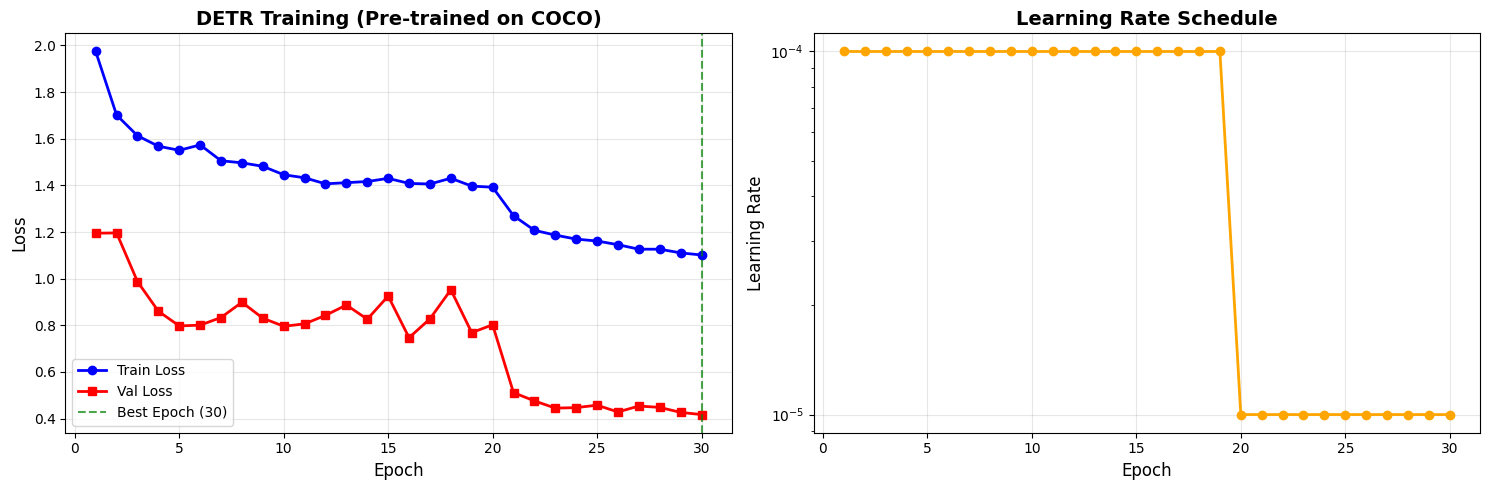

In [ ]:
# =============================
# DATASET CLASS
class DETRParkingDataset(torch.utils.data.Dataset):
    def __init__(self, images_dir, labels_dir, processor, train=True):
        self.images = sorted([f for f in os.listdir(images_dir)
                             if f.endswith(('.jpg', '.png'))])
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.processor = processor
        self.train = train

        if train:
            self.transform = A.Compose([
                A.HorizontalFlip(p=0.5),
                A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.3),
                A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.3),
            ], bbox_params=A.BboxParams(format='coco', label_fields=['category'],
                                        min_visibility=0.3))
        else:
            self.transform = None

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.images_dir, img_name)
        image = Image.open(img_path).convert("RGB")
        image_np = np.array(image)

        label_path = os.path.join(self.labels_dir,
                                 img_name.replace(".jpg", ".txt").replace(".png", ".txt"))

        boxes = []
        labels = []
        width, height = image.size

        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                for line in f.readlines():
                    line = line.strip()
                    if not line:
                        continue

                    parts = line.split()
                    if len(parts) != 5:
                        continue

                    try:
                        cls, x, y, w, h = map(float, parts)
                    except ValueError:
                        continue

                    # Convert YOLO to COCO format
                    x_center = x * width
                    y_center = y * height
                    box_width = w * width
                    box_height = h * height

                    x_min = max(0, x_center - box_width / 2)
                    y_min = max(0, y_center - box_height / 2)

                    if box_width > 0 and box_height > 0:
                        boxes.append([x_min, y_min, box_width, box_height])
                        labels.append(int(cls))

        # Apply augmentation
        if self.transform and len(boxes) > 0:
            try:
                transformed = self.transform(
                    image=image_np,
                    bboxes=boxes,
                    category=labels
                )
                image_np = transformed['image']
                boxes = transformed['bboxes']
                labels = transformed['category']
            except:
                pass

        # Handle empty annotations
        if len(boxes) == 0:
            boxes = [[0, 0, 1, 1]]
            labels = [0]

        # Prepare annotations
        annotations = []
        for box, label in zip(boxes, labels):
            annotations.append({
                'bbox': box,
                'category_id': label,
                'area': box[2] * box[3],
                'iscrowd': 0
            })

        target = {
            'image_id': idx,
            'annotations': annotations
        }

        # Process with DETR processor
        encoding = self.processor(
            images=image_np,
            annotations=target,
            return_tensors="pt"
        )

        pixel_values = encoding["pixel_values"].squeeze(0)

        labels_dict = {
            'class_labels': encoding['labels'][0]['class_labels'],
            'boxes': encoding['labels'][0]['boxes'],
        }

        return pixel_values, labels_dict


def collate_fn(batch):
    pixel_values = [item[0] for item in batch]
    labels = [item[1] for item in batch]
    return torch.stack(pixel_values), labels


# =============================
# CONFIGURATION
# =============================
class DETRConfig:
    # Paths
    train_images_dir = "/content/drive/MyDrive/KLTN/data/train/images"
    train_labels_dir = "/content/drive/MyDrive/KLTN/data/train/labels"
    val_images_dir = "/content/drive/MyDrive/KLTN/data/valid/images"
    val_labels_dir = "/content/drive/MyDrive/KLTN/data/valid/labels"

    # Model
    model_name = "facebook/detr-resnet-50"  # Pre-trained on COCO
    num_classes = 1  # car only

    # Training
    num_epochs = 30
    batch_size = 2
    learning_rate = 1e-4
    weight_decay = 1e-4
    lr_drop = 20

    # Device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Early stopping
    patience = 7

    # Save
    output_dir = "detr_pretrained"

config = DETRConfig()
os.makedirs(config.output_dir, exist_ok=True)


# =============================
# LOAD MODEL - WITH PRE-TRAINED WEIGHTS
# =============================
print("="*70)
print("LOADING DETR MODEL WITH TRANSFER LEARNING")
print("="*70)

processor = DetrImageProcessor.from_pretrained(config.model_name)

# Load pre-trained DETR model from COCO
# This includes pre-trained ResNet-50 backbone and transformer
model = DetrForObjectDetection.from_pretrained(
    config.model_name,  # facebook/detr-resnet-50 (COCO pre-trained)
    num_labels=config.num_classes,  # Change to 1 class (car)
    ignore_mismatched_sizes=True  # Allow different output sizes
)

model.to(config.device)

print("  Loaded COCO pre-trained weights:")
print("   • Backbone: ResNet-50 trained on ImageNet + COCO")
print("   • Transformer Encoder: Pre-trained on COCO")
print("   • Transformer Decoder: Pre-trained on COCO")
print("   • Object queries: Pre-trained patterns")
print("\n Modified classification head:")
print("   • Old: 91 classes (COCO)")
print("   • New: 1 class (car)")
print("   • Only classification layer is re-initialized")
print("   • All other layers keep pre-trained weights")
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")
print("="*70 + "\n")


# =============================
# PREPARE DATASETS
# =============================
train_dataset = DETRParkingDataset(
    config.train_images_dir,
    config.train_labels_dir,
    processor,
    train=True
)

val_dataset = DETRParkingDataset(
    config.val_images_dir,
    config.val_labels_dir,
    processor,
    train=False
)

train_loader = DataLoader(
    train_dataset,
    batch_size=config.batch_size,
    shuffle=True,
    collate_fn=collate_fn,
    num_workers=2,
    pin_memory=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=config.batch_size,
    shuffle=False,
    collate_fn=collate_fn,
    num_workers=2,
    pin_memory=True
)

print(f" Training samples: {len(train_dataset)}")
print(f" Validation samples: {len(val_dataset)}")
print(f" Training batches: {len(train_loader)}")
print(f" Validation batches: {len(val_loader)}\n")


# =============================
# OPTIMIZER AND SCHEDULER
# =============================
# Different LR for backbone and transformer (DETR best practice)
param_dicts = [
    {
        "params": [p for n, p in model.named_parameters()
                   if "backbone" not in n and p.requires_grad]
    },
    {
        "params": [p for n, p in model.named_parameters()
                   if "backbone" in n and p.requires_grad],
        "lr": config.learning_rate / 10,  # Lower LR for pre-trained backbone
    },
]

optimizer = torch.optim.AdamW(
    param_dicts,
    lr=config.learning_rate,
    weight_decay=config.weight_decay
)

lr_scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=config.lr_drop,
    gamma=0.1
)

print("    Optimizer configured:")
print(f"   Transformer LR: {config.learning_rate}")
print(f"   Backbone LR: {config.learning_rate / 10} (lower for fine-tuning)")
print(f"   Weight decay: {config.weight_decay}")
print(f"   LR drop at epoch: {config.lr_drop}\n")


# =============================
# EARLY STOPPING
# =============================
class EarlyStopping:
    def __init__(self, patience=7, min_delta=0.001, verbose=True):
        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_epoch = 0

    def __call__(self, val_loss, epoch):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.best_epoch = epoch
            if self.verbose:
                print(f"  Initial best val_loss: {val_loss:.4f}")
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.verbose:
                print(f"  No improvement. EarlyStopping: {self.counter}/{self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True
                if self.verbose:
                    print(f"  Early stopping triggered! Best was epoch {self.best_epoch+1}")
        else:
            if self.verbose:
                improvement = self.best_loss - val_loss
                print(f"  Val loss improved by {improvement:.4f}")
            self.best_loss = val_loss
            self.best_epoch = epoch
            self.counter = 0

        return self.early_stop


# =============================
# VALIDATION FUNCTION
# =============================
@torch.no_grad()
def validate(model, val_loader, device):
    model.eval()
    val_loss = 0
    loss_dict_total = {}
    num_batches = 0

    for pixel_values, targets in tqdm(val_loader, desc="Validating", leave=False):
        pixel_values = pixel_values.to(device)
        targets = [{k: v.to(device) if isinstance(v, torch.Tensor) else v
                   for k, v in t.items()} for t in targets]

        outputs = model(pixel_values=pixel_values, labels=targets)

        loss = outputs.loss
        val_loss += loss.item()

        if hasattr(outputs, 'loss_dict'):
            for key, value in outputs.loss_dict.items():
                if key not in loss_dict_total:
                    loss_dict_total[key] = 0
                loss_dict_total[key] += value.item()

        num_batches += 1

    avg_val_loss = val_loss / num_batches if num_batches > 0 else 0

    for key in loss_dict_total:
        loss_dict_total[key] /= num_batches

    return avg_val_loss, loss_dict_total


# =============================
# TRAINING LOOP
# =============================
early_stopping = EarlyStopping(patience=config.patience, verbose=True)
best_val_loss = float('inf')
best_epoch = 0
train_losses = []
val_losses = []
learning_rates = []

scaler = torch.amp.GradScaler('cuda') if torch.cuda.is_available() else None
use_amp = torch.cuda.is_available()

print("="*70)
print("STARTING DETR TRAINING WITH TRANSFER LEARNING")
print("="*70)
print(f"Device: {config.device}")
print(f"Epochs: {config.num_epochs}")
print(f"Batch size: {config.batch_size}")
print(f"Mixed Precision: {use_amp}")
print(f"Pre-trained: COCO weights")
print("="*70 + "\n")

for epoch in range(config.num_epochs):
    # Training
    model.train()
    epoch_loss = 0
    num_batches = 0

    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{config.num_epochs}')

    for pixel_values, targets in progress_bar:
        pixel_values = pixel_values.to(config.device)
        targets = [{k: v.to(config.device) if isinstance(v, torch.Tensor) else v
                   for k, v in t.items()} for t in targets]

        if use_amp:
            with torch.amp.autocast('cuda'):
                outputs = model(pixel_values=pixel_values, labels=targets)
                loss = outputs.loss

            optimizer.zero_grad()
            scaler.scale(loss).backward()

            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.1)

            scaler.step(optimizer)
            scaler.update()
        else:
            outputs = model(pixel_values=pixel_values, labels=targets)
            loss = outputs.loss

            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.1)
            optimizer.step()

        epoch_loss += loss.item()
        num_batches += 1

        progress_bar.set_postfix({'loss': f'{loss.item():.4f}'})

    avg_train_loss = epoch_loss / num_batches
    train_losses.append(avg_train_loss)

    # Validation
    val_loss, val_loss_dict = validate(model, val_loader, config.device)
    val_losses.append(val_loss)

    # Update LR
    lr_scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']
    learning_rates.append(current_lr)

    # Print summary
    print(f"\n{'='*70}")
    print(f"EPOCH {epoch+1}/{config.num_epochs} SUMMARY")
    print(f"{'='*70}")
    print(f"Train Loss: {avg_train_loss:.4f}")
    print(f"Val Loss: {val_loss:.4f}")
    if val_loss_dict:
        print("Val Loss Components:")
        for key, value in val_loss_dict.items():
            print(f"   {key}: {value:.4f}")
    print(f"Learning Rate: {current_lr:.6f}")

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_epoch = epoch

        model.save_pretrained(os.path.join(config.output_dir, "best_model"))
        processor.save_pretrained(os.path.join(config.output_dir, "best_model"))

        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': lr_scheduler.state_dict(),
            'train_loss': avg_train_loss,
            'val_loss': val_loss,
            'pretrained': True,  # Mark as pre-trained
        }, os.path.join(config.output_dir, 'best_checkpoint.pth'))

        print(f"Saved best model! (val_loss: {val_loss:.4f})")
    else:
        print(f"Best val_loss: {best_val_loss:.4f} (epoch {best_epoch+1})")

    # Checkpoint
    if (epoch + 1) % 5 == 0:
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': lr_scheduler.state_dict(),
            'train_losses': train_losses,
            'val_losses': val_losses,
        }, os.path.join(config.output_dir, f'checkpoint_epoch_{epoch+1}.pth'))
        print(f"Checkpoint saved at epoch {epoch+1}")

    # Early stopping
    if early_stopping(val_loss, epoch):
        print(f"\n{'='*70}")
        print("TRAINING STOPPED EARLY")
        print(f"{'='*70}")
        print(f"Final Epoch: {epoch+1}/{config.num_epochs}")
        print(f"Best Epoch: {best_epoch+1}")
        print(f"Best Val Loss: {best_val_loss:.4f}")
        print(f"{'='*70}\n")
        break

# Save final model
model.save_pretrained(os.path.join(config.output_dir, "final_model"))
processor.save_pretrained(os.path.join(config.output_dir, "final_model"))

print("\n" + "="*70)
print("DETR TRAINING COMPLETED WITH TRANSFER LEARNING")
print("="*70)
print(f"Total Epochs: {len(train_losses)}")
print(f"Best Epoch: {best_epoch+1}")
print(f"Best Val Loss: {best_val_loss:.4f}")
print(f"Models saved in: {config.output_dir}")
print(f"Pre-trained: COCO weights")
print("="*70 + "\n")


# =============================
# VISUALIZATION
# =============================
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax1 = axes[0]
epochs_range = range(1, len(train_losses) + 1)
ax1.plot(epochs_range, train_losses, 'b-', label='Train Loss', linewidth=2, marker='o')
ax1.plot(epochs_range, val_losses, 'r-', label='Val Loss', linewidth=2, marker='s')
ax1.axvline(x=best_epoch+1, color='g', linestyle='--',
            label=f'Best Epoch ({best_epoch+1})', alpha=0.7)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('DETR Training (Pre-trained on COCO)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

ax2 = axes[1]
ax2.plot(epochs_range, learning_rates, 'orange', linewidth=2, marker='o', markersize=6)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Learning Rate', fontsize=12)
ax2.set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(config.output_dir, 'training_curves.png'), dpi=300)
print(f"Training curves saved to: {config.output_dir}/training_curves.png")
plt.show()

In [ ]:
import shutil
import os

source_folder = '/content/detr_pretrained/best_model'
destination_folder = '/content/drive/MyDrive/KLTN/best_model_1'

try:
    # Check if the destination folder already exists
    if os.path.exists(destination_folder):
        print(f"Destination folder '{destination_folder}' already exists. Deleting it to ensure a clean copy.")
        shutil.rmtree(destination_folder)

    shutil.copytree(source_folder, destination_folder)
    print(f"Successfully copied '{source_folder}' to '{destination_folder}'")
except FileNotFoundError:
    print(f"Error: Source folder '{source_folder}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully copied '/content/detr_pretrained/best_model' to '/content/drive/MyDrive/KLTN/best_model_1'
